<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08



<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1ZAicRye9Ixj7jijCwNhU8Fhf6Rmjp2Z7" width = "200" align="center"/>

El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_style("white")

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_08/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante",
             "modelo",
             "transmision",
             "traccion",
             "clase",
             "combustible",
             "consumo"],

          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


In [3]:
display(df.isna().sum())
display(df.shape)


year                    0
desplazamiento          2
cilindros               3
co2                     0
clase_tipo              0
traccion_tipo           0
transmision_tipo        0
combustible_tipo        0
tamano_motor_tipo       2
consumo_tipo            0
co2_tipo                0
consumo_litros_milla    0
dtype: int64

(36791, 12)

In [4]:
df.dtypes

year                      int64
desplazamiento          float64
cilindros               float64
co2                     float64
clase_tipo               object
traccion_tipo            object
transmision_tipo         object
combustible_tipo         object
tamano_motor_tipo        object
consumo_tipo             object
co2_tipo                 object
consumo_litros_milla    float64
dtype: object

In [5]:
df.nunique()

year                     35
desplazamiento           65
cilindros                 9
co2                     596
clase_tipo                8
traccion_tipo             2
transmision_tipo          2
combustible_tipo          4
tamano_motor_tipo         5
consumo_tipo              5
co2_tipo                  5
consumo_litros_milla     49
dtype: int64

En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**.

In [6]:
y = df['clase_tipo']

num_cols = ['desplazamiento', 'co2', 'consumo_litros_milla', 'cilindros', 'year']
cat_cols = ['traccion_tipo', 'transmision_tipo',
            'combustible_tipo', 'tamano_motor_tipo', 'consumo_tipo',
             'co2_tipo']

In [7]:
df_num = df[num_cols]
df_num = df_num.fillna(df_num.mean())

scaler = MinMaxScaler()
scaler.set_output(transform='pandas')
df_num = scaler.fit_transform(df_num)

In [8]:
df_cat = df[cat_cols]
df_cat = pd.get_dummies(df_cat)

get_dummies analiza cada columna del dataframe, de modo que si una columna tiene n valores categóricos, se crean n columnas con el mismo nombre de la original, pero añadiendo el valor como sufijo, y se le pone 1 si el dato posee tal valor en la columna.

Por ejemplo, si en la columna 'traccion_tipo', el dato tiene valor 'cuatro', se le pone 1 en la columna 'traccion_tipo_cuatro' y 0 en el resto de columnas con el prefijo 'traccion'.

In [9]:
df_procesado = df_num.join(df_cat)
display(df_procesado)

,desplazamiento,co2,consumo_litros_milla,cilindros,year,traccion_tipo_cuatro,traccion_tipo_dos,transmision_tipo_Automatica,transmision_tipo_Manual,combustible_tipo_Hibrido,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.243590,0.398014,0.331027,0.142857,0.000000,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.461538,0.527672,0.475113,0.285714,0.000000,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.243590,0.424351,0.360294,0.142857,0.029412,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.461538,0.527672,0.475113,0.285714,0.029412,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.410256,0.424351,0.360294,0.285714,0.088235,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0.051282,0.173307,0.083878,0.071429,0.911765,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
36787,0.038462,0.174919,0.090196,0.071429,0.941176,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
36788,0.038462,0.182174,0.096886,0.071429,0.941176,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
36789,0.038462,0.176532,0.090196,0.071429,0.970588,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

In [10]:
clf = KMeans(n_clusters=8, n_init=10)
clf.fit(df_procesado)

clusters = clf.labels_
center_clusters = clf.cluster_centers_

predict_df = df_procesado.copy()
predict_df['cluster'] = clusters

grouped = predict_df.groupby(['cluster'])

In [11]:
center_clusters

array([[ 3.16166884e-01,  3.07017374e-01,  2.28254196e-01,
         2.62267134e-01,  7.16259385e-01,  3.09581460e-01,
         6.90418540e-01,  8.56796956e-01,  1.43203044e-01,
         2.07540643e-03,  2.62884815e-01,  1.20027672e-01,
         6.15012107e-01,  1.13109651e-01,  6.59979246e-01,
         2.66343826e-02,  1.31096506e-01,  6.91802145e-02,
         1.03770322e-03,  9.40850917e-01,  6.91802145e-04,
        -2.16493490e-15,  5.74195780e-02, -2.08166817e-15,
         9.28398478e-01,  5.60359737e-02, -3.66373598e-15,
         1.55655483e-02],
       [ 1.68719231e-01,  2.40953188e-01,  1.56450341e-01,
         1.45284693e-01,  5.68765647e-01,  8.83708322e-02,
         9.11629168e-01,  5.13147194e-01,  4.86852806e-01,
         8.40336134e-03,  7.65790187e-01,  5.24532394e-02,
         1.73353212e-01,  4.06614259e-04,  2.56166983e-02,
         1.18238752e-14,  7.55353754e-01,  2.18487395e-01,
         2.35922393e-15, -1.22679644e-14,  1.35538086e-04,
         1.28508315e-14,  9.99

In [12]:
new_cat_cols = [x for x in df_procesado.columns if x not in num_cols]

means = grouped[num_cols].mean()
modes = grouped[new_cat_cols].agg(pd.Series.mode)

print('Medias de variables numéricos por cluster:')
display(means)
print('\nModas de variables categóricas por cluster ')
display(modes)

Medias de variables numéricos por cluster:


,desplazamiento,co2,consumo_litros_milla,cilindros,year
cluster,,,,,
0,0.316313,0.307027,0.228263,0.262391,0.716250
1,0.168719,0.240953,0.156450,0.145285,0.568766
2,0.562730,0.501887,0.442585,0.405562,0.452443
3,0.367380,0.354118,0.281892,0.300807,0.593400
4,0.450932,0.410007,0.343266,0.327283,0.477446
5,0.326643,0.354566,0.282675,0.253750,0.390606
6,0.585745,0.510381,0.454567,0.430904,0.383707
7,0.216547,0.303475,0.225302,0.159038,0.415237



Modas de variables categóricas por cluster 


,traccion_tipo_cuatro,traccion_tipo_dos,transmision_tipo_Automatica,transmision_tipo_Manual,combustible_tipo_Hibrido,combustible_tipo_Normal,combustible_tipo_Otros tipos de combustible,combustible_tipo_Premium,tamano_motor_tipo_grande,tamano_motor_tipo_mediano,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
cluster,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0
1,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,1,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
5,0,1,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6,0,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

In [13]:
N_cluster = (5, 10, 20, 30, 50, 75, 100, 200, 300)

kmeans = [KMeans(n_clusters=i, n_init=10) for i in N_cluster]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


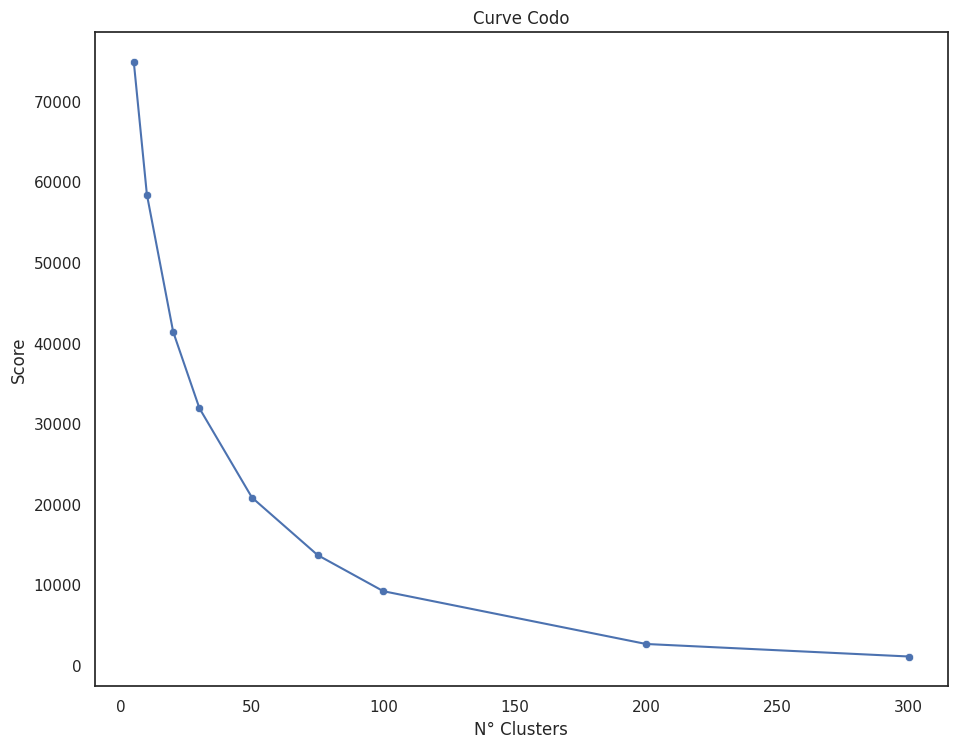

In [14]:
df_scores = pd.DataFrame({'N° Clusters': N_cluster, 'Score': score})

df_scores.head()

fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Curve Codo')
sns.lineplot(x='N° Clusters',
             y='Score',
            data=df_scores)
sns.scatterplot(x='N° Clusters',
             y='Score',
             data=df_scores)
plt.show()

Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

200 es apropiado.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases).



In [15]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [16]:
dataset = load_iris()

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'
iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris['species'] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [17]:
print('Medias por feature:')
display(iris[features].mean())

print('\nVarianzas por feature:')
display(iris[features].var())


Medias por feature:


sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64


Varianzas por feature:


sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

# PCA

In [18]:
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=2))
pca_pipe.fit(iris[features])

modelo_pca = pca_pipe.named_steps['pca']

components = pd.DataFrame(
    data    = modelo_pca.components_,
    columns = features,
    index   = ['PC1', 'PC2']
)

In [19]:
components

,sepal_length,sepal_width,petal_length,petal_width
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942


<Axes: >

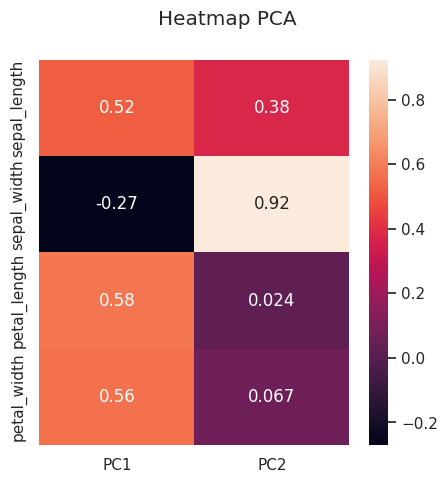

In [20]:
fig, axes = plt.subplots(figsize=(5,5))
fig.suptitle('Heatmap PCA')
sns.heatmap(components.T, annot=True, ax=axes)

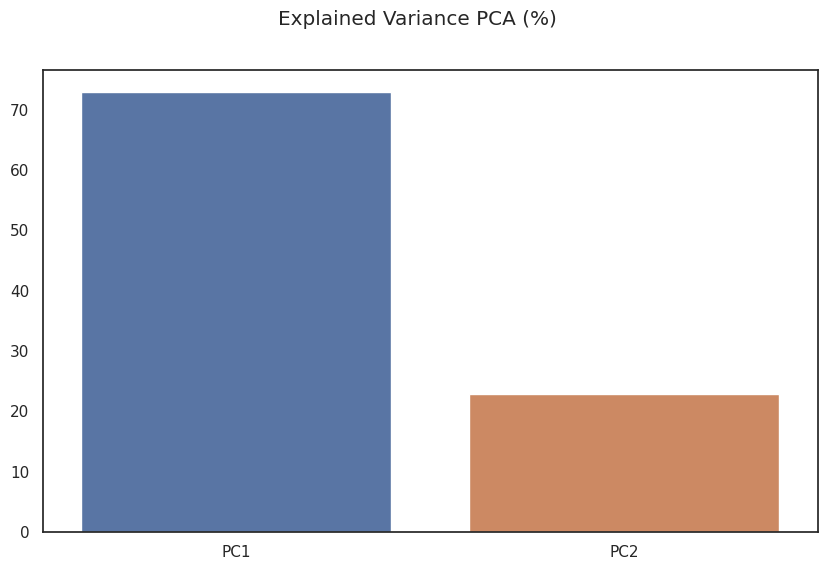

In [21]:
explanied_variance = pd.DataFrame(
    data = np.round(modelo_pca.explained_variance_ratio_*100,3).T,
    columns = ['Explained Variance'],
    index = components.T.columns.tolist()
).T

fig, axes = plt.subplots(figsize=(10,6))
fig.suptitle('Explained Variance PCA (%)')
sns.barplot(explanied_variance, ax=axes)

plt.show()

In [22]:
pca_pipe.set_output(transform='pandas')
proyected_iris = pca_pipe.transform(iris[features])
proyected_iris.columns = ['PC1', 'PC2']

proyected_iris = proyected_iris.join(iris['species'])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


<Axes: xlabel='PC1', ylabel='PC2'>

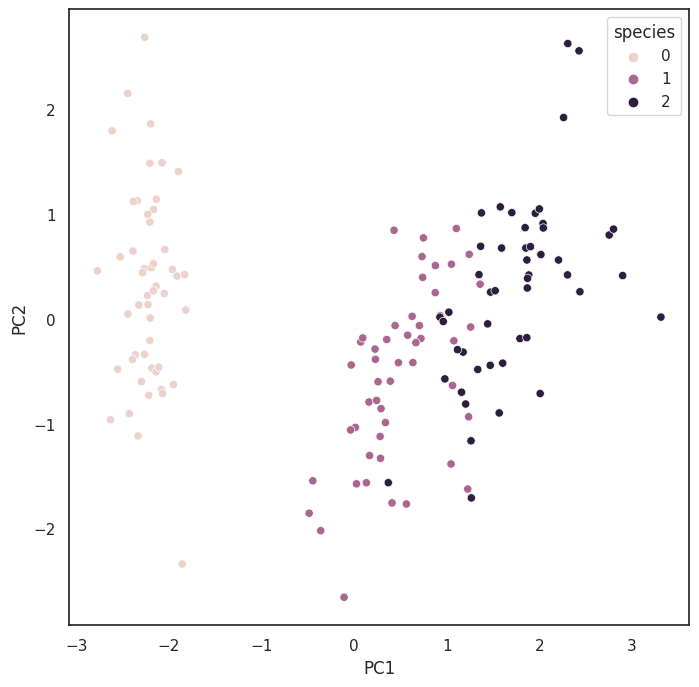

In [23]:
fig, axes = plt.subplots(figsize=(8,8))

sns.scatterplot(data = proyected_iris, x='PC1', y='PC2', hue='species', ax=axes)

# t-SNE

In [24]:
tsne_pipe = make_pipeline(StandardScaler(), TSNE())

proyected_iris = pd.DataFrame(
    data = tsne_pipe.fit_transform(iris[features]),
    columns = ['D1', 'D2']
)

proyected_iris = proyected_iris.join(iris['species'])

In [25]:
proyected_iris

,D1,D2,species
0,-26.283514,-0.934040,0
1,-22.458551,-1.582246,0
2,-23.502516,-0.568364,0
3,-22.724354,-0.502646,0
4,-26.786913,-0.364475,0
...,...,...,...
145,12.384520,0.200850,2
146,6.782580,-2.073794,2
147,11.200541,0.227081,2
148,13.349828,-1.299510,2


<Axes: xlabel='D1', ylabel='D2'>

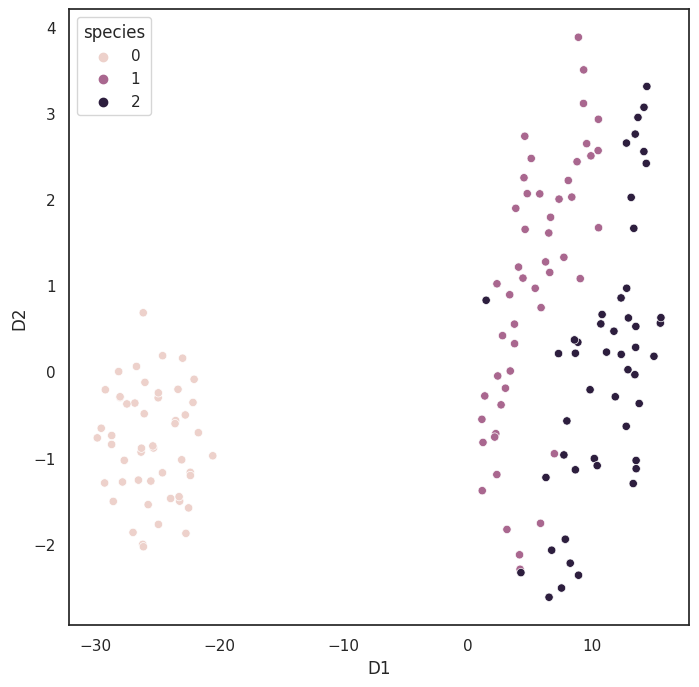

In [26]:
fig, axes = plt.subplots(figsize=(8,8))

sns.scatterplot(data = proyected_iris, x='D1', y='D2', hue='species', ax=axes)